In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from lib.ekyn import *
from lib.env import *
import copy
from sage.utils import *
import os

MODEL_ID = os.listdir(EXPERIMENTS_PATH)[0]
# MODEL_ID = f'2024_27_08_17_47_12'

state = torch.load(f'{EXPERIMENTS_PATH}/{MODEL_ID}/state.pt',map_location='cpu',weights_only=False)
model = copy.deepcopy(state['model'])
model.load_state_dict(state['best_model_wts'])
# trainloader,testloader = get_epoched_dataloaders_loo(batch_size=state['batch_size'],robust=state['robust'],fold=state['fold'])
trainloader,testloader = get_epoched_dataloaders_shuffle_split(
    batch_size=state['batch_size'],
    test_size=.2
    )
loss,y_true,y_pred = evaluate(dataloader=testloader,model=model,criterion=state['criterion'],device='cuda')

Text(0.5, 1.0, 'f1 : 0.833')

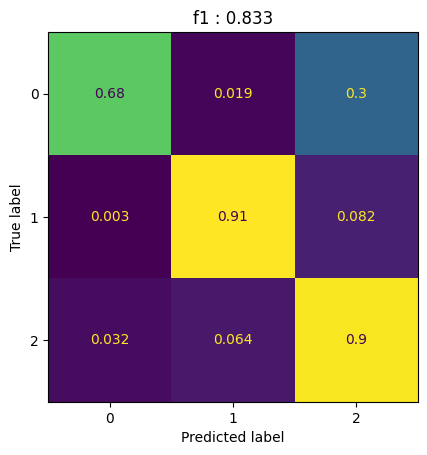

In [12]:
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False)
plt.title(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}')